Generar datos de Ventas

In [1]:
import numpy as np
import pandas as pd

# Generar datos de ventas mensuales para los productos
def generar_datos_ventas(nombre_empresa, productos, start, end):
    # Frecuencia 'M' para obtener meses
    meses = pd.date_range(start=start, end=end, freq='M')
    
    # Simulando ventas aleatorias entre 500 y 2000
    datos_ventas = pd.DataFrame({
        'Meses': meses,
        **{producto: np.random.randint(500, 2000, size=len(meses)) for producto in productos}
    })
    
    # Guardar el archivo CSV
    datos_ventas.to_csv(f'{nombre_empresa}.csv', index=False)
    print(f'Datos generados para {nombre_empresa}')

# Definir los productos
empresa = 'Polleria'
productos = ['Pollo a la brasa', 'Papitas fritas', 'Ensalada', 'Gaseosa']

# Generar datos de ventas
generar_datos_ventas(empresa, productos, '2020-01-01', '2024-09-30')

Datos generados para Polleria


C:\Users\juanito\AppData\Local\Temp\ipykernel_32\3473248672.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses = pd.date_range(start=start, end=end, freq='M')


Lectura del archivo CSV

In [2]:
# Cargar los datos de ventas generados
datos_polleria = pd.read_csv('Polleria.csv')

# Revisar las primeras filas del DataFrame
print(datos_polleria.head())

# Corregir productos
productos = ['Pollo a la brasa', 'Papitas fritas', 'Ensalada', 'Gaseosa']

# Convertir la columna 'Meses' a formato datetime
datos_polleria['Meses'] = pd.to_datetime(datos_polleria['Meses'])

# Utilizar el número de mes para predecir (transformación de la fecha)
X_polleria = datos_polleria['Meses'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Las ventas de los productos son las que queremos predecir (Y)
Y_polleria = datos_polleria[productos].values


        Meses  Pollo a la brasa  Papitas fritas  Ensalada  Gaseosa
0  2020-01-31               556            1456      1994     1895
1  2020-02-29              1917            1549      1574     1105
2  2020-03-31               558            1528      1692     1493
3  2020-04-30              1983             783      1543      724
4  2020-05-31              1234            1342      1678     1988


Implementar el modelo de Deep Learning

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Escalar las características (ventas) entre -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))
Y_polleria_scaled = scaler.fit_transform(Y_polleria)

# Crear el modelo de Deep Learning
modelo_polleria = Sequential()
modelo_polleria.add(Dense(32, activation='relu', input_shape=(1,)))
modelo_polleria.add(Dense(32, activation='relu'))
modelo_polleria.add(Dense(4))  # 4 productos

# Compilar el modelo
modelo_polleria.compile(optimizer='adam', loss='mean_absolute_error')

# Entrenar el modelo
modelo_polleria.fit(X_polleria, Y_polleria_scaled, epochs=50, verbose=1)

Epoch 1/50


c:\Users\juanito\anaconda3\envs\juanito\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 69675.2500
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63653.5195
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57652.9688
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52534.6602
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46713.6172
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43166.3711 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39467.0625  
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35767.8516
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32100.2480  
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28633.3516   
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25146.0898
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22298.4180
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19840.8223   
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18242.4004 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

Realizar la predicción para el año 2025

In [6]:
# Generar las fechas para el año 2025
meses_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')
X_2025 = np.array([pd.Timestamp(mes).toordinal() for mes in meses_2025]).reshape(-1, 1)

# Realizar las predicciones
predicciones_polleria_scaled = modelo_polleria.predict(X_2025)
predicciones_polleria = scaler.inverse_transform(predicciones_polleria_scaled)

# Mostrar las predicciones para 2025
print(predicciones_polleria)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[ 219721.28  224059.03 -169653.97 -209578.78]
 [ 219725.62  224069.17 -169651.05 -209572.94]
 [ 219719.1   224054.7  -169671.44 -209584.61]
 [ 219745.95  224099.56 -169659.78 -209595.55]
 [ 219753.2   224095.22 -169677.27 -209610.14]
 [ 219756.83  224086.53 -169697.64 -209615.98]
 [ 219769.53  224112.6  -169691.83 -209624.73]
 [ 219784.05  224121.27 -169703.47 -209634.22]
 [ 219792.75  224148.77 -169694.73 -209637.86]
 [ 219801.81  224144.42 -169709.3  -209653.9 ]
 [ 219810.52  224141.53 -169726.77 -209654.64]
 [ 219828.66  224169.03 -169723.86 -209675.06]]


C:\Users\juanito\AppData\Local\Temp\ipykernel_32\412251361.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')


Visualizar los resultados

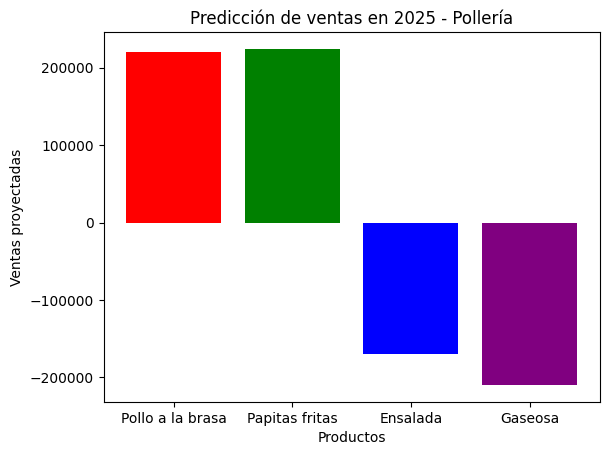

In [7]:
import matplotlib.pyplot as plt

# Ventas proyectadas en diciembre 2025
ventas_2025 = predicciones_polleria[-1]

# Graficar las ventas proyectadas
plt.bar(productos, ventas_2025, color=['red', 'green', 'blue', 'purple'])
plt.title('Predicción de ventas en 2025 - Pollería')
plt.ylabel('Ventas proyectadas')
plt.xlabel('Productos')
plt.show()
